# Pandas

## Series

In [1]:
import numpy as np
import pandas as pd

In [192]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [3]:
obj.values  ## 값만 따로 확인

array([ 4,  7, -5,  3], dtype=int64)

In [4]:
obj.index ## index 범위값 확인

RangeIndex(start=0, stop=4, step=1)

In [5]:
obj.dtypes ## 데이터형 확인

dtype('int64')

In [6]:
## 원하는 값으로 index 정의
obj2 = pd.Series([4, 7, -5, 3], index=['d','b','a','c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [138]:
## dictionary 형태로도 가능
data = {'이소연':22, '신지섭':26, '곽홍재':23, '김보현':22}
obj3 = pd.Series(data)
obj3

이소연    22
신지섭    26
곽홍재    23
김보현    22
dtype: int64

In [139]:
## Series 이름과 index 이름 정의해주기
obj3.name = "스터디 멘토"
obj3.index.name = "이름"
obj3

이름
이소연    22
신지섭    26
곽홍재    23
김보현    22
Name: 스터디 멘토, dtype: int64

In [140]:
## index 값 바꾸기
obj3.index = ['소연','지섭','홍재','보현']
obj3

소연    22
지섭    26
홍재    23
보현    22
Name: 스터디 멘토, dtype: int64

## DataFrame

### 1) DataFrame 다루기

In [211]:
data = {
    'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
    'year': [2000, 2001, 2002, 2001, 2002],
    'pop': [1.5, 1.7, 3.6, 2.4, 2.9]
}
df = pd.DataFrame(data)
df

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
state    5 non-null object
year     5 non-null int64
pop      5 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 200.0+ bytes


In [26]:
## 행 이름
df.index

RangeIndex(start=0, stop=5, step=1)

In [277]:
## 열 이름
df.columns
# df.keys()

Index(['state', 'year', 'pop'], dtype='object')

In [28]:
df.values

array([['Ohio', 2000, 1.5],
       ['Ohio', 2001, 1.7],
       ['Ohio', 2002, 3.6],
       ['Nevada', 2001, 2.4],
       ['Nevada', 2002, 2.9]], dtype=object)

In [116]:
df.size ## size는 행의 개수 x 열의 개수

15

In [269]:
df.shape
# df.shape[0] #행 개수
# df.shape[1] #열 개수

(5, 3)

In [119]:
len(df)

5

In [29]:
df.describe() ## column에 대한 통계적인 수치

,year,pop
count,5.00000,5.000000
mean,2001.20000,2.420000
std,0.83666,0.864292
min,2000.00000,1.500000
25%,2001.00000,1.700000
50%,2001.00000,2.400000
75%,2002.00000,2.900000
max,2002.00000,3.600000


In [30]:
## 백분위 구간 지정
df.describe(percentiles=[.1,.2,.3,.7])

,year,pop
count,5.00000,5.000000
mean,2001.20000,2.420000
std,0.83666,0.864292
min,2000.00000,1.500000
10%,2000.40000,1.580000
20%,2000.80000,1.660000
30%,2001.00000,1.840000
50%,2001.00000,2.400000
70%,2001.80000,2.800000
max,2002.00000,3.600000


In [162]:
df.describe().astype('int')

,year,pop
count,5,5
mean,2001,2
std,0,0
min,2000,1
25%,2001,1
50%,2001,2
75%,2002,2
max,2002,3


In [288]:
## 열추가
df['num'] = [0,1,2,3,4] 
# df['num'] = np.arange(5)
df

,state,year,pop,num2,num
0,Ohio,2000,1.5,5.0,0
1,Ohio,2001,1.7,NaN,1
2,Ohio,2002,3.6,6.0,2
3,Nevada,2001,2.4,NaN,3
4,Nevada,2002,2.9,7.0,4


In [285]:
num2 = pd.Series([5,6,7], index=[0,2,4])
df['num2'] = num2 ;df

,state,year,pop,num,num2
0,Ohio,2000,1.5,0,5.0
1,Ohio,2001,1.7,1,NaN
2,Ohio,2002,3.6,2,6.0
3,Nevada,2001,2.4,3,NaN
4,Nevada,2002,2.9,4,7.0


In [289]:
## 열삭제
del df['num'] ;df

,state,year,pop,num2
0,Ohio,2000,1.5,5.0
1,Ohio,2001,1.7,NaN
2,Ohio,2002,3.6,6.0
3,Nevada,2001,2.4,NaN
4,Nevada,2002,2.9,7.0


In [290]:
df.drop('num2', axis=1, inplace=True) # drop한 후의 데이터프레임으로 기존 데이터프레임을 대체
# df = df.drop('num2', axis=1)
df

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


### 2) indexing
- 열 indexing

In [35]:
df.state

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
Name: state, dtype: object

In [55]:
df['state']

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
Name: state, dtype: object

In [31]:
## 여러개의 열을 동시에 indexing [[]] 대괄호를 두개!!
df[['state', 'pop']]

,state,pop
0,Ohio,1.5
1,Ohio,1.7
2,Ohio,3.6
3,Nevada,2.4
4,Nevada,2.9


In [130]:
df.filter(['state', 'year']) # filter 오직 열만 추출가능

,state,year
0,Ohio,2000
1,Ohio,2001
2,Ohio,2002
3,Nevada,2001
4,Nevada,2002


In [131]:
df.filter(like='s') # column명에 's'가 포함된 column추출

,state
0,Ohio
1,Ohio
2,Ohio
3,Nevada
4,Nevada


- 행 indexing
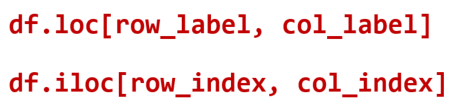

In [297]:
df2 = pd.DataFrame({
    "name" : ['soyeon','hanseok','jiseob','bohyeon','bohyeon','hongjae'],
    "age" : [22, 23, 26, 22, 21, 23],
    "year" : [2016, 2017, 2018, 2019, 2019, 2017],
    "points" : [1.5, 1.7, 2.0, 3.8, 1.9, 2.3] 
})
df2

,name,age,year,points
0,soyeon,22,2016,1.5
1,hanseok,23,2017,1.7
2,jiseob,26,2018,2.0
3,bohyeon,22,2019,3.8
4,bohyeon,21,2019,1.9
5,hongjae,23,2017,2.3


In [298]:
## iloc - 행 번호 (0 부터) 기준
df2.iloc[1:3]

,name,age,year,points
1,hanseok,23,2017,1.7
2,jiseob,26,2018,2.0


In [295]:
df2.iloc[3]

name      bohyeon
age            22
year         2019
points        3.8
Name: 3, dtype: object

In [299]:
df2.iloc[1:3,0:3]

,name,age,year
1,hanseok,23,2017
2,jiseob,26,2018


In [90]:
df2.iloc[1:3,:]

,name,age,year,points
1,hanseok,23,2017,1.7
2,jiseob,26,2018,2.0


In [91]:
df2.iloc[:,-3:-1]

,age,year
0,22,2016
1,23,2017
2,26,2018
3,22,2019
4,21,2019
5,23,2017


In [92]:
df2.iloc[:,-3:]

,age,year,points
0,22,2016,1.5
1,23,2017,1.7
2,26,2018,2.0
3,22,2019,3.8
4,21,2019,1.9
5,23,2017,2.3


In [302]:
df2.iloc[[0,1,3] , [1,3]]

,age,points
0,22,1.5
1,23,1.7
3,22,3.8


In [303]:
df2.iloc[1,2]

2017

In [301]:
## loc - 인덱스 (이름) 기준
df2.loc[1:3]

,name,age,year,points
1,hanseok,23,2017,1.7
2,jiseob,26,2018,2.0
3,bohyeon,22,2019,3.8


In [96]:
df2.loc[1:3,'name':'year']

,name,age,year
1,hanseok,23,2017
2,jiseob,26,2018
3,bohyeon,22,2019


In [97]:
df2.loc[:,['name','year']]

,name,year
0,soyeon,2016
1,hanseok,2017
2,jiseob,2018
3,bohyeon,2019
4,bohyeon,2019
5,hongjae,2017


In [98]:
df2.loc[1:3,:]

,name,age,year,points
1,hanseok,23,2017,1.7
2,jiseob,26,2018,2.0
3,bohyeon,22,2019,3.8


In [99]:
df2.loc[0,'age']

22

In [100]:
df2.loc[:,:]

,name,age,year,points
0,soyeon,22,2016,1.5
1,hanseok,23,2017,1.7
2,jiseob,26,2018,2.0
3,bohyeon,22,2019,3.8
4,bohyeon,21,2019,1.9
5,hongjae,23,2017,2.3


- boolean indexing

In [101]:
df2['year'] > 2017

0    False
1    False
2     True
3     True
4     True
5    False
Name: year, dtype: bool

In [102]:
df2.loc[df2['year'] > 2017, :]

,name,age,year,points
2,jiseob,26,2018,2.0
3,bohyeon,22,2019,3.8
4,bohyeon,21,2019,1.9


In [133]:
df2.loc[df2['age'] > df2['age'].mean(), ['name','age']]

,name,age
1,hanseok,23
2,jiseob,26
5,hongjae,23


In [311]:
df2.loc[df2['name'] == 'bohyeon', ['name','points']]

,name,points
3,bohyeon,3.8
4,bohyeon,1.9


In [104]:
## 조건이 여러개 일 때
df2.loc[(df2['name'] == 'bohyeon') & (df2['points'] < 2), ['name','age','points']]

,name,age,points
4,bohyeon,21,1.9


In [134]:
df2.query('year > 2017')

,name,age,year,points
2,jiseob,26,2018,2.0
3,bohyeon,22,2019,3.8
4,bohyeon,21,2019,1.9


In [135]:
df2.query('age > age.mean()').filter(['name','age'])

,name,age
1,hanseok,23
2,jiseob,26
5,hongjae,23


In [136]:
df2.query('name =="bohyeon" and points < 2').filter(['name','age','points'])

,name,age,points
4,bohyeon,21,1.9


### 4) DataFrame에서 Series 추출

In [141]:
df.state

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
Name: state, dtype: object

In [142]:
df.state.size ## 행의 개수와 열의 개수의 곱

5

In [143]:
df.state.size == len(df.state)

True

In [151]:
pop = df['pop']
pop.mean(), pop.max(), pop.min(), pop.std()

(2.4200000000000004, 3.6, 1.5, 0.8642916174532761)

In [110]:
df.state.value_counts() ## Series의 unique value들을 count

Ohio      3
Nevada    2
Name: state, dtype: int64

In [114]:
df.state.unique()

array(['Ohio', 'Nevada'], dtype=object)

In [115]:
df.state.nunique()

2

In [163]:
df.state.isnull()

0    False
1    False
2    False
3    False
4    False
Name: state, dtype: bool

In [167]:
pop + 1

0    2.5
1    2.7
2    4.6
3    3.4
4    3.9
Name: pop, dtype: float64

In [171]:
pop.add(1) # add, sub, mul, div, floordiv, mod, pow

0    2.5
1    2.7
2    4.6
3    3.4
4    3.9
Name: pop, dtype: float64

In [172]:
(((pop + 1) * 2) // 3).sum()

9.0

### 5) Summarizing Data
<img align="left" src="http://drive.google.com/uc?export=view&id=16CeMSPNyCjyICq_KlJm7ERWNoJfKwgZo">
<img align="left" src="http://drive.google.com/uc?export=view&id=1eCA7rRFojxc7WIG7xrVasuCbWuoY2KGT">

In [304]:
df

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [216]:
df.min(axis=0) ## axis=0 이면 행 기준, default

state    Nevada
year       2000
pop         1.5
dtype: object

In [214]:
df.min(axis=1) ## axis=1 이면 열 기준

0    1.5
1    1.7
2    3.6
3    2.4
4    2.9
dtype: float64

In [307]:
df.sum()

state    OhioOhioOhioNevadaNevada
year                        10006
pop                          12.1
dtype: object

In [310]:
df.count() ## nan 값이 아닌 관측값의 수

state    5
year     5
pop      5
dtype: int64

## Reading and Writing Data
<br>
<img align="left" src="http://drive.google.com/uc?export=view&id=1PQtlrD6iwmV9kp5uJrcSsLWpkYih9wGI" width=500 height=400>
###### 읽을때는 pd. 쓸때는 dataframe. 

In [199]:
import pandas as pd

In [226]:
titanic = pd.read_csv('titanic.csv', encoding='cp949')

In [258]:
titanic2 = pd.read_table('titanic.csv', sep=',', encoding='cp949')

In [237]:
excel = pd.read_excel('example2.xlsx')

In [254]:
titanic = pd.read_csv('titanic.csv', encoding='cp949', index_col=0)
# titanic = pd.read_csv('titanic.csv', encoding='cp949', index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [271]:
example = pd.read_csv('example_none.txt',sep='|', header=None) ; example

,0,1,2,3,4
0,C1,1,2,3,4
1,C2,5,6,7,8
2,C3,1,3,5,7


In [272]:
example = pd.read_csv('example_none.txt',sep='|', header=None, names=['ID','A','B','C','D'] )  ; example

,ID,A,B,C,D
0,C1,1,2,3,4
1,C2,5,6,7,8
2,C3,1,3,5,7


In [270]:
df

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [296]:
df.to_csv('df.csv')

In [275]:
df.to_csv('df.csv', sep=',', index=False)